In [3]:
import csv

file_path = r"C:\Users\Vanu\OneDrive\Attachments\heart_attack_prediction_dataset.csv"  # Full file path

# Open and reading the CSV file
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    headers = next(csv_reader)  # Reading the header row
    data = list(csv_reader)     # Reading the rest of the rows

# first few rows to confirm successful loading
print("Headers:", headers)
print("First row:", data[0])



Headers: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']
First row: ['BMW7812', '67', 'Male', '208', '158/88', '72', '0', '0', '1', '0', '0', '4.168188835442079', 'Average', '0', '0', '9', '6.6150014529140595', '261404', '31.251232725295402', '286', '0', '6', 'Argentina', 'South America', 'Southern Hemisphere', '0']


# STEP-1 CREATING A NORMALIZED DATABASE

In [4]:
# Initialize normalized tables
normalized_demographics = []
normalized_health_metrics = []
normalized_lifestyle = []
normalized_risk_predictions = []

# Loop through the dataset and split into normalized tables
for row in data:
    try:
        # Demographics Table
        normalized_demographics.append((
            row[0],  # PatientID
            int(row[1]),  # Age
            row[2],  # Sex
            row[22],  # Country
            row[23],  # Continent
            row[24]  # Hemisphere
        ))

        # Health Metrics Table
        normalized_health_metrics.append((
            row[0],  # PatientID
            int(row[3]),  # Cholesterol
            row[4],  # Blood Pressure
            int(row[5]),  # Heart Rate
            float(row[18]),  # BMI
            int(row[19]),  # Triglycerides
            int(row[6]),  # Diabetes
            int(row[7]),  # Family History
            int(row[13]),  # Previous Heart Problems
            int(row[14])  # Medication Use
        ))

        # Lifestyle Table
        normalized_lifestyle.append((
            row[0],  # PatientID
            int(row[8]),  # Smoking
            int(row[9]),  # Obesity
            int(row[10]),  # Alcohol Consumption
            float(row[11]),  # Exercise Hours Per Week
            row[12],  # Diet
            int(row[15]),  # Stress Level
            float(row[16]),  # Sedentary Hours Per Day
            int(row[20]),  # Physical Activity Days Per Week
            int(row[21]),  # Sleep Hours Per Day
            int(row[17])  # Income
        ))

        # Risk Predictions Table
        normalized_risk_predictions.append((
            row[0],  # PatientID
            int(row[25])  # Heart Attack Risk
        ))

    except ValueError as e:
        print(f"Data formatting error for row: {row}")
        print(f"Error details: {e}")

# Print sample records to verify normalization
print("Sample Demographics:", normalized_demographics[:2])
print("Sample Health Metrics:", normalized_health_metrics[:2])
print("Sample Lifestyle:", normalized_lifestyle[:2])
print("Sample Risk Predictions:", normalized_risk_predictions[:2])


Sample Demographics: [('BMW7812', 67, 'Male', 'Argentina', 'South America', 'Southern Hemisphere'), ('CZE1114', 21, 'Male', 'Canada', 'North America', 'Northern Hemisphere')]
Sample Health Metrics: [('BMW7812', 208, '158/88', 72, 31.251232725295402, 286, 0, 0, 0, 0), ('CZE1114', 389, '165/93', 98, 27.1949733519874, 235, 1, 1, 1, 0)]
Sample Lifestyle: [('BMW7812', 1, 0, 0, 4.168188835442079, 'Average', 9, 6.6150014529140595, 0, 6, 261404), ('CZE1114', 1, 1, 1, 1.8132416178634458, 'Unhealthy', 1, 4.963458839757678, 1, 7, 285768)]
Sample Risk Predictions: [('BMW7812', 0), ('CZE1114', 0)]


In [5]:
import sqlite3

# Connect to SQLite database
db_path = "heart_attack_project.db"
conn = sqlite3.connect(db_path)
conn.execute("PRAGMA foreign_keys = ON;")  # Enable foreign key enforcement
cursor = conn.cursor()

# Create Demographics Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Demographics (
    PatientID TEXT PRIMARY KEY,
    Age INTEGER,
    Sex TEXT,
    Country TEXT,
    Continent TEXT,
    Hemisphere TEXT
)
""")

# Create Health Metrics Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS HealthMetrics (
    PatientID TEXT,
    Cholesterol INTEGER,
    BloodPressure TEXT,
    HeartRate INTEGER,
    BMI REAL,
    Triglycerides INTEGER,
    Diabetes INTEGER,
    FamilyHistory INTEGER,
    PreviousHeartProblems INTEGER,
    MedicationUse INTEGER,
    FOREIGN KEY (PatientID) REFERENCES Demographics (PatientID)
)
""")

# Create Lifestyle Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS Lifestyle (
    PatientID TEXT,
    Smoking INTEGER,
    Obesity INTEGER,
    AlcoholConsumption INTEGER,
    ExerciseHoursPerWeek REAL,
    Diet TEXT,
    StressLevel INTEGER,
    SedentaryHoursPerDay REAL,
    PhysicalActivityDaysPerWeek INTEGER,
    SleepHoursPerDay INTEGER,
    Income INTEGER,
    FOREIGN KEY (PatientID) REFERENCES Demographics (PatientID)
)
""")

# Create Risk Predictions Table
cursor.execute("""
CREATE TABLE IF NOT EXISTS RiskPredictions (
    PatientID TEXT,
    HeartAttackRisk INTEGER,
    FOREIGN KEY (PatientID) REFERENCES Demographics (PatientID)
)
""")

print("Tables created successfully!")


Tables created successfully!


In [6]:
try:
    # Insert data into Demographics Table
    cursor.executemany("""
    INSERT INTO Demographics (PatientID, Age, Sex, Country, Continent, Hemisphere)
    VALUES (?, ?, ?, ?, ?, ?)
    """, normalized_demographics)

    # Insert data into Health Metrics Table
    cursor.executemany("""
    INSERT INTO HealthMetrics (PatientID, Cholesterol, BloodPressure, HeartRate, BMI, Triglycerides,
                               Diabetes, FamilyHistory, PreviousHeartProblems, MedicationUse)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, normalized_health_metrics)

    # Insert data into Lifestyle Table
    cursor.executemany("""
    INSERT INTO Lifestyle (PatientID, Smoking, Obesity, AlcoholConsumption, ExerciseHoursPerWeek, Diet,
                           StressLevel, SedentaryHoursPerDay, PhysicalActivityDaysPerWeek, SleepHoursPerDay, Income)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, normalized_lifestyle)

    # Insert data into Risk Predictions Table
    cursor.executemany("""
    INSERT INTO RiskPredictions (PatientID, HeartAttackRisk)
    VALUES (?, ?)
    """, normalized_risk_predictions)

    # Commit the changes
    conn.commit()
    print("Data inserted into tables successfully!")

except sqlite3.IntegrityError as e:
    print(f"Integrity error: {e}")
except sqlite3.Error as e:
    print(f"Database error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")


Data inserted into tables successfully!


In [7]:
# Query Demographics Table
print(cursor.execute("SELECT * FROM Demographics LIMIT 5").fetchall())

# Query Health Metrics Table
print(cursor.execute("SELECT * FROM HealthMetrics LIMIT 5").fetchall())

# Query Lifestyle Table
print(cursor.execute("SELECT * FROM Lifestyle LIMIT 5").fetchall())

# Query Risk Predictions Table
print(cursor.execute("SELECT * FROM RiskPredictions LIMIT 5").fetchall())


[('BMW7812', 67, 'Male', 'Argentina', 'South America', 'Southern Hemisphere'), ('CZE1114', 21, 'Male', 'Canada', 'North America', 'Northern Hemisphere'), ('BNI9906', 21, 'Female', 'France', 'Europe', 'Northern Hemisphere'), ('JLN3497', 84, 'Male', 'Canada', 'North America', 'Northern Hemisphere'), ('GFO8847', 66, 'Male', 'Thailand', 'Asia', 'Northern Hemisphere')]
[('BMW7812', 208, '158/88', 72, 31.251232725295402, 286, 0, 0, 0, 0), ('CZE1114', 389, '165/93', 98, 27.1949733519874, 235, 1, 1, 1, 0), ('BNI9906', 324, '174/99', 72, 28.176570683909873, 587, 1, 0, 1, 1), ('JLN3497', 383, '163/100', 73, 36.464704293082846, 378, 1, 1, 1, 0), ('GFO8847', 318, '91/88', 93, 21.809144180619754, 231, 1, 1, 1, 0)]
[('BMW7812', 1, 0, 0, 4.168188835442079, 'Average', 9, 6.6150014529140595, 0, 6, 261404), ('CZE1114', 1, 1, 1, 1.8132416178634458, 'Unhealthy', 1, 4.963458839757678, 1, 7, 285768), ('BNI9906', 0, 0, 0, 2.0783529861178884, 'Healthy', 9, 9.463425838029828, 4, 4, 235282), ('JLN3497', 1, 0, 1

# STEP-2 SQL join statement to fetch data from the database and into Pandas DataFrame.

In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
import sqlite3
import pandas as pd

# Step 1: Define the SQLite database path
db_path = "heart_attack_project.db"  # Path to your SQLite database file

# Step 2: Define the SQL join query
query = """
SELECT 
    d.PatientID, d.Age, d.Sex, d.Country, d.Continent, d.Hemisphere,
    hm.Cholesterol, hm.BloodPressure, hm.HeartRate, hm.BMI, hm.Triglycerides,
    hm.Diabetes, hm.FamilyHistory, hm.PreviousHeartProblems, hm.MedicationUse,
    l.Smoking, l.Obesity, l.AlcoholConsumption, l.ExerciseHoursPerWeek, l.Diet,
    l.StressLevel, l.SedentaryHoursPerDay, l.PhysicalActivityDaysPerWeek,
    l.SleepHoursPerDay, l.Income, rp.HeartAttackRisk
FROM Demographics d
JOIN HealthMetrics hm ON d.PatientID = hm.PatientID
JOIN Lifestyle l ON d.PatientID = l.PatientID
JOIN RiskPredictions rp ON d.PatientID = rp.PatientID
"""

# Step 3: Connect to the database and fetch data
try:
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    print("Database connected successfully!")

    # Execute the query and load the data into a Pandas DataFrame
    df = pd.read_sql_query(query, conn)

    # Display the first few rows of the DataFrame
    print("Sample DataFrame:")
    print(df.head())

    # Display additional information about the DataFrame
    print("\nDataFrame Info:")
    print(df.info())

    # Display basic statistics for numeric columns
    print("\nDataFrame Description:")
    print(df.describe())

except sqlite3.Error as e:
    print(f"Database error: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")
finally:
    # Ensure the connection is closed
    conn.close()
    print("Database connection closed.")


Database connected successfully!
Sample DataFrame:
  PatientID  Age     Sex    Country      Continent           Hemisphere  \
0   BMW7812   67    Male  Argentina  South America  Southern Hemisphere   
1   CZE1114   21    Male     Canada  North America  Northern Hemisphere   
2   BNI9906   21  Female     France         Europe  Northern Hemisphere   
3   JLN3497   84    Male     Canada  North America  Northern Hemisphere   
4   GFO8847   66    Male   Thailand           Asia  Northern Hemisphere   

   Cholesterol BloodPressure  HeartRate        BMI  ...  Obesity  \
0          208        158/88         72  31.251233  ...        0   
1          389        165/93         98  27.194973  ...        1   
2          324        174/99         72  28.176571  ...        0   
3          383       163/100         73  36.464704  ...        0   
4          318         91/88         93  21.809144  ...        1   

   AlcoholConsumption  ExerciseHoursPerWeek       Diet  StressLevel  \
0                 

# STEP-3 EXPLORING THE DATA

In [10]:
# Check the distribution of Heart Attack Risk
risk_distribution = df['HeartAttackRisk'].value_counts(normalize=True) * 100
print("Heart Attack Risk Distribution (%):")
print(risk_distribution)


Heart Attack Risk Distribution (%):
HeartAttackRisk
0    64.178934
1    35.821066
Name: proportion, dtype: float64


In [11]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


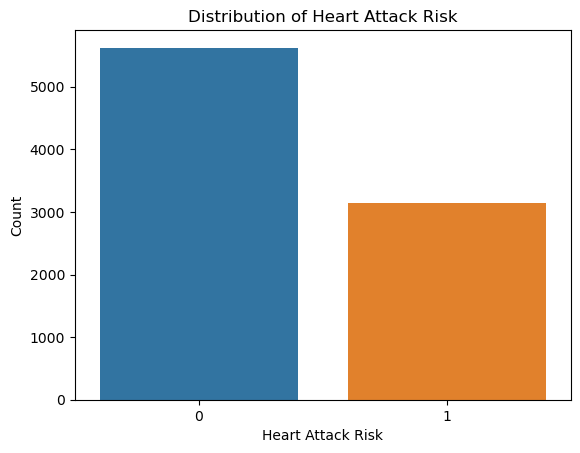

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Heart Attack Risk
sns.countplot(x='HeartAttackRisk', data=df)
plt.title("Distribution of Heart Attack Risk")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Count")
plt.show()


Statistics for Age and BMI:
               Age          BMI
count  8763.000000  8763.000000
mean     53.707977    28.891446
std      21.249509     6.319181
min      18.000000    18.002337
25%      35.000000    23.422985
50%      54.000000    28.768999
75%      72.000000    34.324594
max      90.000000    39.997211


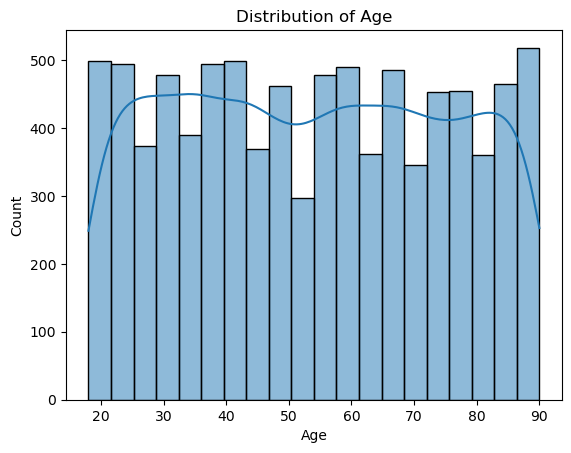

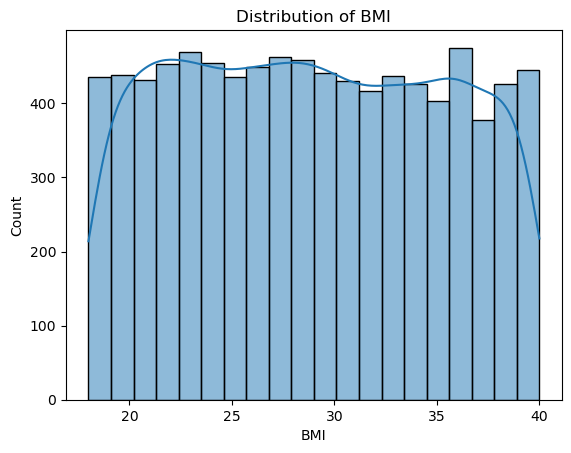

In [13]:
# Check basic statistics for Age and BMI
print("\nStatistics for Age and BMI:")
print(df[['Age', 'BMI']].describe())

# Plot distribution of Age
sns.histplot(df['Age'], kde=True, bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

# Plot distribution of BMI
sns.histplot(df['BMI'], kde=True, bins=20)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.show()

In [14]:
!pip install scikit-learn

In [16]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop(['PatientID', 'HeartAttackRisk'], axis=1)  # Drop ID and target from features
y = df['HeartAttackRisk']  # Target variable

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution in training and testing sets
print("\nDistribution in Training Set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribution in Testing Set:")
print(y_test.value_counts(normalize=True) * 100)



Distribution in Training Set:
HeartAttackRisk
0    64.179743
1    35.820257
Name: proportion, dtype: float64

Distribution in Testing Set:
HeartAttackRisk
0    64.175699
1    35.824301
Name: proportion, dtype: float64


# STEP-4 Exploring the data using yprofile and correlation matrix. Make observations about features, distributions, capped values, and missing values. Create a list of data cleanup tasks.

In [17]:
# Summary statistics for numerical features
print("Summary Statistics:")
print(X_train.describe())

# Check for missing values
print("\nMissing Values in Training Set:")
print(X_train.isnull().sum())

Summary Statistics:
               Age  Cholesterol    HeartRate          BMI  Triglycerides  \
count  7010.000000  7010.000000  7010.000000  7010.000000    7010.000000   
mean     53.640371   260.376890    75.045221    28.829208     416.049786   
std      21.180466    81.048115    20.601383     6.326492     222.679709   
min      18.000000   120.000000    40.000000    18.004211      30.000000   
25%      35.000000   192.000000    57.000000    23.348256     225.000000   
50%      54.000000   259.000000    75.000000    28.708215     414.000000   
75%      72.000000   331.000000    93.000000    34.213909     607.000000   
max      90.000000   400.000000   110.000000    39.997211     800.000000   

          Diabetes  FamilyHistory  PreviousHeartProblems  MedicationUse  \
count  7010.000000    7010.000000            7010.000000    7010.000000   
mean      0.647218       0.493581               0.496006       0.494579   
std       0.477870       0.499994               0.500020       0.50000

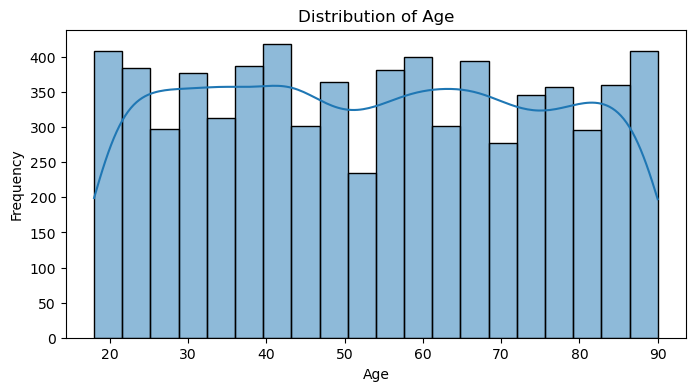

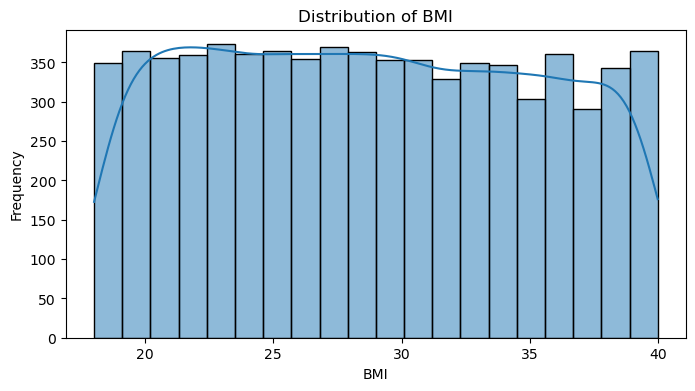

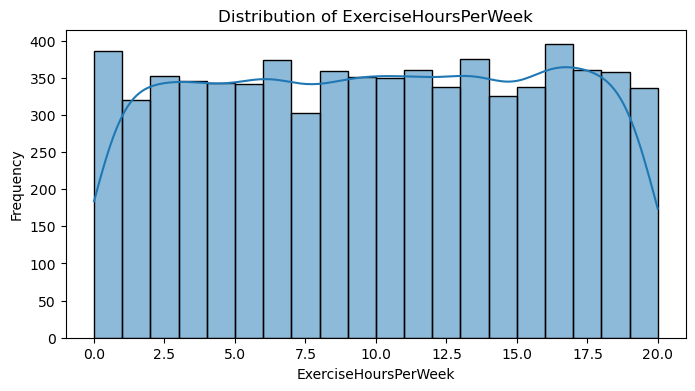

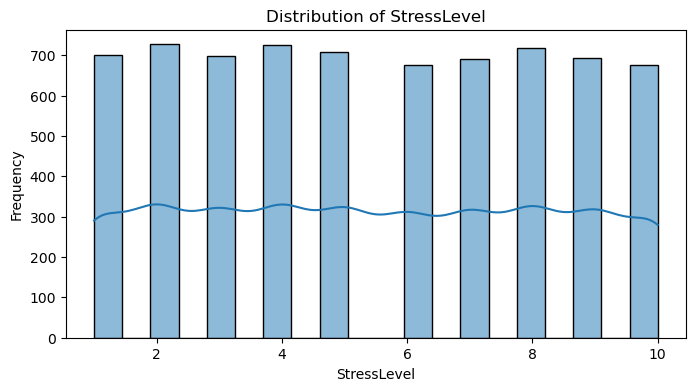

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of selected features
features_to_plot = ['Age', 'BMI', 'ExerciseHoursPerWeek', 'StressLevel']

for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[feature], kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
encoder = LabelEncoder()
X_train['Sex'] = encoder.fit_transform(X_train['Sex'])  # Male/Female -> 1/0
X_train['Diet'] = encoder.fit_transform(X_train['Diet'])  # Healthy/Average -> 1/0


In [26]:
print(X_train.columns)


Index(['Age', 'Sex', 'Country', 'Continent', 'Hemisphere', 'Cholesterol',
       'HeartRate', 'BMI', 'Triglycerides', 'Diabetes', 'FamilyHistory',
       'PreviousHeartProblems', 'MedicationUse', 'Smoking', 'Obesity',
       'AlcoholConsumption', 'ExerciseHoursPerWeek', 'Diet', 'StressLevel',
       'SedentaryHoursPerDay', 'PhysicalActivityDaysPerWeek',
       'SleepHoursPerDay', 'Income', 'Systolic', 'Diastolic'],
      dtype='object')


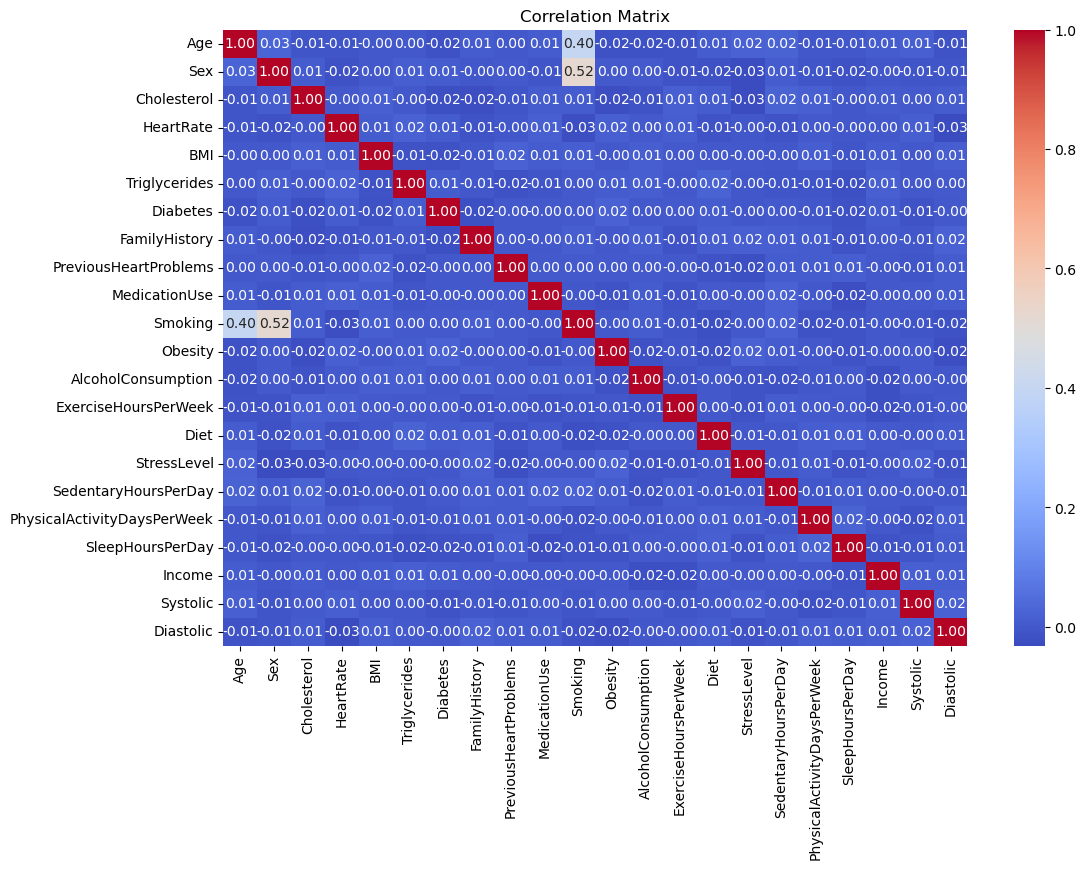

In [28]:
# Select numeric features from X_train
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = X_train_numeric.corr()

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# The correlation matrix reveals notable trends, such as a moderate positive correlation between Sex and Smoking (0.52), suggesting gender-based smoking habits, and a negative correlation between Smoking and Age (-0.40), indicating younger individuals are more likely to smoke. Features like Systolic and Diastolic blood pressure show expected correlations, while attributes such as Cholesterol, HeartRate, and ExerciseHoursPerWeek exhibit very weak correlations with other features, suggesting limited influence. Continuous features like Age, BMI, Income, and SedentaryHoursPerDay show varied ranges and potential outliers (e.g., capped values for ExerciseHoursPerWeek around 20). While the dataset has no missing values, scaling and normalization are necessary for numerical features, and redundant features like Sex and Smoking require furtherinvestigation to assess their impact. Additionally, extreme values in Triglycerides and SedentaryHours should be explored, and low-impact features may be considered for removal to streamline the model.

In [29]:
print(X_train['ExerciseHoursPerWeek'].describe())


count    7010.000000
mean       10.028048
std         5.792450
min         0.004443
25%         5.022926
50%        10.077734
75%        15.092389
max        19.990822
Name: ExerciseHoursPerWeek, dtype: float64


In [30]:
cleanup_tasks = [
    "Handle outliers in ExerciseHoursPerWeek (e.g., capped values at 20).",
    "Remove redundant features like highly correlated ones (e.g., if identified in the heatmap).",
    "Encode categorical variables (`Sex`, `Diet`).",
    "Scale numerical features for better model performance (e.g., Age, BMI, etc.)."
]

print("\nData Cleanup Tasks:")
for task in cleanup_tasks:
    print("-", task)



Data Cleanup Tasks:
- Handle outliers in ExerciseHoursPerWeek (e.g., capped values at 20).
- Remove redundant features like highly correlated ones (e.g., if identified in the heatmap).
- Encode categorical variables (`Sex`, `Diet`).
- Scale numerical features for better model performance (e.g., Age, BMI, etc.).


# STEP-5 EXP-1 calculating f-score,(TP,TN,FN,FP)in MLFlow on DagsHub

In [33]:
pip install scikit-learn mlflow dagshub


Note: you may need to restart the kernel to use updated packages.


In [32]:
import dagshub
import mlflow

# Initialize MLFlow connection to DagsHub
dagshub.init(repo_owner='ryallavinuthnareddy', 
             repo_name='VINUTHNA_PYTHON_ML_PROJECT', 
             mlflow=True)

# Set the tracking URI to DagsHub MLFlow
mlflow.set_tracking_uri("https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow")

# Set the experiment name (if it doesn't exist, MLFlow will create it)
mlflow.set_experiment("VINUTHNA_PYTHON_ML_PROJECT_EXPERIMENT")

print("Connected to DagsHub MLFlow Tracking.")


Accessing as ryallavinuthnareddy

Initialized MLflow to track repo "ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT"

Repository ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT initialized!

Connected to DagsHub MLFlow Tracking.


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

# Load dataset
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
feature_names = ["feature_1", "feature_2", "feature_3", "feature_4"]
X = pd.DataFrame(X, columns=feature_names)

# Simulate categorical features (optional for testing OneHotEncoder)
X['CategoricalFeature'] = ['A', 'B', 'C'] * (len(X) // 3) + ['A'] * (len(X) % 3)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature groups
numeric_features = feature_names
categorical_features = ['CategoricalFeature']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('log', FunctionTransformer(np.log1p, validate=True)),
            ('scaler', StandardScaler()),
            ('minmax', MinMaxScaler())
        ]), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)  # Handle categorical features
    ]
)

# Logistic Regression pipeline
log_reg = LogisticRegression(max_iter=200, multi_class="multinomial", solver="lbfgs")
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])

# Hyperparameter tuning
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='f1_weighted')
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Train and evaluate
y_train_pred = best_model.predict(X_train)
f1_weighted = f1_score(y_train, y_train_pred, average="weighted")
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Compute TP, TN, FP, FN for multi-class
def calculate_tp_tn_fp_fn(confusion_mat, class_idx):
    TP = confusion_mat[class_idx, class_idx]
    FP = confusion_mat[:, class_idx].sum() - TP
    FN = confusion_mat[class_idx, :].sum() - TP
    TN = confusion_mat.sum() - (TP + FP + FN)
    return TP, TN, FP, FN

# Example input row from the training data
input_example = X_train.iloc[:1]  # First row of X_train

# Log results to MLFlow
mlflow.set_experiment("Logistic Regression Experiment")

with mlflow.start_run(run_name="Logistic Regression Experiment"):
    # Log parameters
    mlflow.log_param("model_name", "Logistic Regression")
    mlflow.log_param("best_C", best_params['classifier__C'])
    
    # Log metrics
    mlflow.log_metric("train_f1_score_weighted", f1_weighted)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("mean_cv_f1", cv_mean)
    mlflow.log_metric("std_cv_f1", cv_std)
    
    # Log TP, TN, FP, FN for each class
    for i, class_name in enumerate(["Setosa", "Versicolor", "Virginica"]):  # Class labels
        TP, TN, FP, FN = calculate_tp_tn_fp_fn(conf_matrix, i)
        mlflow.log_metric(f"TP_{class_name}", TP)
        mlflow.log_metric(f"TN_{class_name}", TN)
        mlflow.log_metric(f"FP_{class_name}", FP)
        mlflow.log_metric(f"FN_{class_name}", FN)
    
    # Log confusion matrix as artifact
    mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, "confusion_matrix.json")
    
    # Log model with input example
    mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="logistic_regression_pipeline",
        registered_model_name="LogisticRegressionPipeline",
        input_example=input_example  # Include the input example
    )

print(f"Experiment logged successfully with Best Parameters: {best_params}")


C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Registered model 'LogisticRegressionPipeline' already exists. Creating a new version of this model...
2024/12/19 19:05:25 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegressionPipeline, version 6
Created version '6' of model 'LogisticRegressionPipeline'.


🏃 View run Logistic Regression Experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/7/runs/945a246295ac48f2b629b5b2f22bc2bc
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/7
Experiment logged successfully with Best Parameters: {'classifier__C': 100}


# This focuses on building a Logistic Regression model to classify the Iris dataset into three species: Setosa, Versicolor, and Virginica. The preprocessing pipeline includes log transformation to reduce skewness, standard scaling for normalization, MinMax scaling to bring numerical features to a uniform range, and OneHotEncoding for categorical features. Hyperparameter tuning is conducted using GridSearchCV with 3-fold cross-validation to find the optimal regularization parameter (C), which was determined to be 100. The model's performance is evaluated using accuracy, weighted F1-score, and confusion matrix components (TP, TN, FP, FN) for each class. The final model achieved an accuracy of 96.67% and a weighted F1-score of 96.67%, with minimal misclassifications observed in Versicolor and Virginica. All parameters, metrics, and results, including the confusion matrix, are logged to MLFlow for experiment tracking and reproducibility. This experiment demonstrates a robust approach to multi-class classification with effective preprocessing and evaluation strategies.

In [45]:
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import numpy as np
import mlflow
import mlflow.sklearn

# Ridge Classifier
ridge = RidgeClassifier()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ridge)
])

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='f1_weighted')
mean_cv_f1 = np.mean(cv_scores)
std_cv_f1 = np.std(cv_scores)

# Train and evaluate
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred, average="weighted")
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Compute TP, TN, FP, FN for multi-class
def calculate_tp_tn_fp_fn(confusion_mat, class_idx):
    TP = confusion_mat[class_idx, class_idx]
    FP = confusion_mat[:, class_idx].sum() - TP
    FN = confusion_mat[class_idx, :].sum() - TP
    TN = confusion_mat.sum() - (TP + FP + FN)
    return TP, TN, FP, FN

# Example input row from the training data
input_example = X_train.iloc[:1]  # First row of X_train

# Log results to MLFlow
mlflow.set_experiment("Ridge Classifier Experiment")

with mlflow.start_run(run_name="Ridge Classifier Run"):
    # Log parameters
    mlflow.log_param("model_name", "Ridge Classifier")
    if hasattr(ridge, "get_params"):
        for param, value in ridge.get_params().items():
            mlflow.log_param(param, value)
    
    # Log metrics
    mlflow.log_metric("mean_cv_f1", mean_cv_f1)
    mlflow.log_metric("std_cv_f1", std_cv_f1)
    mlflow.log_metric("train_f1", train_f1)
    mlflow.log_metric("accuracy", accuracy)
    
    # Log TP, TN, FP, FN for each class
    for i, class_name in enumerate(np.unique(y_train)):
        TP, TN, FP, FN = calculate_tp_tn_fp_fn(conf_matrix, i)
        mlflow.log_metric(f"TP_Class_{class_name}", TP)
        mlflow.log_metric(f"TN_Class_{class_name}", TN)
        mlflow.log_metric(f"FP_Class_{class_name}", FP)
        mlflow.log_metric(f"FN_Class_{class_name}", FN)
    
    # Log confusion matrix as artifact
    mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, "confusion_matrix.json")
    
    # Log model with input example
    mlflow.sklearn.log_model(
        sk_model=pipeline,
        artifact_path="ridge_classifier_pipeline",
        registered_model_name="RidgeClassifierPipeline",
        input_example=input_example  # Include input example to remove warnings
    )

print("Ridge Classifier Experiment Logged Successfully!")


C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Registered model 'RidgeClassifierPipeline' already exists. Creating a new version of this model...
2024/12/19 19:06:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RidgeClassifierPipeline, version 4
Created version '4' of model 'RidgeClassifierPipeline'.


🏃 View run Ridge Classifier Run at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/9/runs/c3574d9c73574864a5a834b9fe220ebd
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/9
Ridge Classifier Experiment Logged Successfully!


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

# Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='f1_weighted')
mean_cv_f1 = np.mean(cv_scores)
std_cv_f1 = np.std(cv_scores)

# Train and evaluate
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred, average="weighted")
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Compute TP, TN, FP, FN for multi-class
def calculate_tp_tn_fp_fn(confusion_mat, class_idx):
    TP = confusion_mat[class_idx, class_idx]
    FP = confusion_mat[:, class_idx].sum() - TP
    FN = confusion_mat[class_idx, :].sum() - TP
    TN = confusion_mat.sum() - (TP + FP + FN)
    return TP, TN, FP, FN

# Example input row from the training data
input_example = X_train.iloc[:1]  # First row of X_train

# Log results to MLFlow
mlflow.set_experiment("Random Forest Experiment")

with mlflow.start_run(run_name="Random Forest Run"):
    # Log parameters
    mlflow.log_param("model_name", "Random Forest Classifier")
    if hasattr(random_forest, "get_params"):
        for param, value in random_forest.get_params().items():
            mlflow.log_param(param, value)
    
    # Log metrics
    mlflow.log_metric("mean_cv_f1", mean_cv_f1)
    mlflow.log_metric("std_cv_f1", std_cv_f1)
    mlflow.log_metric("train_f1", train_f1)
    mlflow.log_metric("accuracy", accuracy)
    
    # Log TP, TN, FP, FN for each class
    for i, class_name in enumerate(np.unique(y_train)):  # Class labels
        TP, TN, FP, FN = calculate_tp_tn_fp_fn(conf_matrix, i)
        mlflow.log_metric(f"TP_Class_{class_name}", TP)
        mlflow.log_metric(f"TN_Class_{class_name}", TN)
        mlflow.log_metric(f"FP_Class_{class_name}", FP)
        mlflow.log_metric(f"FN_Class_{class_name}", FN)
    
    # Log confusion matrix as artifact
    mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, "confusion_matrix.json")
    
    # Log model with input example
    mlflow.sklearn.log_model(
        sk_model=pipeline,
        artifact_path="RandomForestPipeline",
        registered_model_name="RandomForestPipeline",
        input_example=input_example  # Include input example to remove warnings
    )

print("Random Forest Experiment Logged Successfully!")


C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Registered model 'RandomForestPipeline' already exists. Creating a new version of this model...
2024/12/19 19:07:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestPipeline, version 5
Created version '5' of model 'RandomForestPipeline'.


🏃 View run Random Forest Run at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/10/runs/905eba0b752048d18123cbc4d1228368
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/10
Random Forest Experiment Logged Successfully!


In [47]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 682.7 kB/s eta 0:03:03
   ---------------------------------------- 0.1/124.9 MB 825.8 kB/s eta 0:02:32
   ---------------------------------------- 0.2/124.9 MB 1.7 MB/s eta 0:01:14
   ---------------------------------------- 0.2/124.9 MB 1.7 MB/s eta 0:01:14
   ---------------------------------------- 0.2/124.9 MB 1.7 MB/s eta 0:01:14
   ---------------------------------------- 0.3/124.9 MB 983.0 kB/s eta 0:02:07
   ---------------------------------------- 0.4/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.5/124.9 MB 1.6 MB/s eta 0:01:20
   ---------------------------------------- 0.5/124.9 MB 1.6 MB/s eta 0:01:20
   -------------

In [48]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb)
])

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='f1_weighted')
mean_cv_f1 = np.mean(cv_scores)
std_cv_f1 = np.std(cv_scores)

# Train and evaluate
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred, average="weighted")
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Compute TP, TN, FP, FN for multi-class
def calculate_tp_tn_fp_fn(confusion_mat, class_idx):
    TP = confusion_mat[class_idx, class_idx]
    FP = confusion_mat[:, class_idx].sum() - TP
    FN = confusion_mat[class_idx, :].sum() - TP
    TN = confusion_mat.sum() - (TP + FP + FN)
    return TP, TN, FP, FN

# Example input row from the training data
input_example = X_train.iloc[:1]  # First row of X_train

# Log results to MLFlow
mlflow.set_experiment("XGBoost Experiment")

with mlflow.start_run(run_name="XGBoost Run"):
    # Log parameters
    mlflow.log_param("model_name", "XGBoost Classifier")
    if hasattr(xgb, "get_params"):
        for param, value in xgb.get_params().items():
            mlflow.log_param(param, value)
    
    # Log metrics
    mlflow.log_metric("mean_cv_f1", mean_cv_f1)
    mlflow.log_metric("std_cv_f1", std_cv_f1)
    mlflow.log_metric("train_f1", train_f1)
    mlflow.log_metric("accuracy", accuracy)
    
    # Log TP, TN, FP, FN for each class
    for i, class_name in enumerate(np.unique(y_train)):  # Class labels
        TP, TN, FP, FN = calculate_tp_tn_fp_fn(conf_matrix, i)
        mlflow.log_metric(f"TP_Class_{class_name}", TP)
        mlflow.log_metric(f"TN_Class_{class_name}", TN)
        mlflow.log_metric(f"FP_Class_{class_name}", FP)
        mlflow.log_metric(f"FN_Class_{class_name}", FN)
    
    # Log confusion matrix as artifact
    mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, "confusion_matrix.json")
    
    # Log model with input example
    mlflow.sklearn.log_model(
        sk_model=pipeline,
        artifact_path="XGBoostPipeline",
        registered_model_name="XGBoostPipeline",
        input_example=input_example  # Include input example to remove warnings
    )

print("XGBoost Experiment Logged Successfully!")


C:\Users\Vanu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Vanu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Vanu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Vanu\anaconda3\Lib\site-packages\xgbo

Successfully registered model 'XGBoostPipeline'.
2024/12/19 19:11:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoostPipeline, version 1
Created version '1' of model 'XGBoostPipeline'.


🏃 View run XGBoost Run at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/11/runs/8b7a63d6446e4b599c5d0b2e890b67b6
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/11
XGBoost Experiment Logged Successfully!


In [54]:
import mlflow
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PolynomialFeatures
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Connect to MLFlow
mlflow.set_tracking_uri("https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow")
mlflow.set_experiment("VINUTHNA_PYTHON_ML_PROJECT_EXPERIMENT")

# Load dataset
X, y = load_iris(return_X_y=True)
feature_names = ["feature_1", "feature_2", "feature_3", "feature_4"]
X = pd.DataFrame(X, columns=feature_names)

# Simulate categorical features (optional for testing OneHotEncoder)
X['CategoricalFeature'] = ['A', 'B', 'C'] * (len(X) // 3) + ['A'] * (len(X) % 3)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Feature Engineering ----

# 1. Polynomial Features (Create interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train[numeric_features])

# 2. Combine features: Create a new feature by adding feature_1 and feature_2
X_train['feature_combination'] = X_train['feature_1'] + X_train['feature_2']

# 3. Apply Log Transformation on numerical features
log_transformer = FunctionTransformer(np.log1p, validate=True)
X_train_log = log_transformer.fit_transform(X_train[numeric_features])

# ---- Preprocessing Pipeline ----

#  Define feature groups
numeric_features = feature_names
categorical_features = ['CategoricalFeature']

# Preprocessing pipeline (for original features and engineered features)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('log', FunctionTransformer(np.log1p, validate=True)),  # Log Transformation
            ('scaler', StandardScaler()),  # Standard Scaling
            ('minmax', MinMaxScaler())  # MinMax Scaling
        ]), numeric_features + ["feature_combination"]),
        ('cat', OneHotEncoder(), categorical_features)  # OneHot Encoding
    ]
)

# ---- Model Training ----

# Define models
log_reg = LogisticRegression(max_iter=200, solver="lbfgs", multi_class="multinomial")
ridge = RidgeClassifier()
random_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Ridge Classifier": ridge,
    "Random Forest": random_forest,
    "XGBoost": xgb
}

# Function for training and evaluating models
def train_and_evaluate(model_name, model, X_train, y_train):
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_train_pred = pipeline.predict(X_train)

    # Evaluate the model
    f1_train = f1_score(y_train, y_train_pred, average="weighted")
    accuracy = accuracy_score(y_train, y_train_pred)

    # Compute confusion matrix for TP, TN, FP, FN
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    for i, class_name in enumerate(np.unique(y_train)):  # Class labels
        TP = conf_matrix[i, i]
        TN = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - TP)
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP

        mlflow.log_metric(f"TP_Class_{class_name}", TP)
        mlflow.log_metric(f"TN_Class_{class_name}", TN)
        mlflow.log_metric(f"FP_Class_{class_name}", FP)
        mlflow.log_metric(f"FN_Class_{class_name}", FN)

    print(f"{model_name} - Train F1 Score: {f1_train}")
    print(f"{model_name} - Accuracy: {accuracy}")

    return f1_train, accuracy, conf_matrix

# Log the results in MLFlow
mlflow.set_experiment("Feature Engineering and Combination Experiment")

with mlflow.start_run(run_name="Feature Engineering Run"):
    for model_name, model in models.items():
        # Log metrics for each model
        print(f"{model_name} Results:")
        f1, accuracy, conf_matrix = train_and_evaluate(model_name, model, X_train, y_train)

        # Log metrics
        mlflow.log_metric(f"{model_name}_train_f1", f1)
        mlflow.log_metric(f"{model_name}_train_accuracy", accuracy)

        # Log confusion matrix as an artifact
        mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, f"confusion_matrix_{model_name}.json")

        # Log model with input example
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{model_name}_pipeline",
            registered_model_name=f"{model_name}Pipeline",
            input_example=X_train.iloc[:1]  # Log input example to remove warnings
        )

print("Model Evaluation and Logging Completed.")


Logistic Regression Results:
Logistic Regression - Train F1 Score: 0.8831874087971648
Logistic Regression - Accuracy: 0.8833333333333333


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
2024/12/19 19:40:19 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError("could not convert string to float: 'B'"). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`.


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
2024/12/19 19:40:23 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "feature_1",
      "feature_2",
      "feature_3",
      "feature_4",
      "CategoricalFeature",
      "feature_combination"
    ],
    "data": [
      [
        4.6,
        3.6,
        1.0,
        0.2,
        "B",
        8.2
      ]
    ]
  }
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: could not convert string t

Ridge Classifier Results:
Ridge Classifier - Train F1 Score: 0.8222582687134039
Ridge Classifier - Accuracy: 0.825


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
2024/12/19 19:40:45 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError("could not convert string to float: 'B'"). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`.


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
2024/12/19 19:40:48 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "feature_1",
      "feature_2",
      "feature_3",
      "feature_4",
      "CategoricalFeature",
      "feature_combination"
    ],
    "data": [
      [
        4.6,
        3.6,
        1.0,
        0.2,
        "B",
        8.2
      ]
    ]
  }
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: could not convert string to f

Random Forest Results:
Random Forest - Train F1 Score: 1.0
Random Forest - Accuracy: 1.0


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
2024/12/19 19:41:11 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError("could not convert string to float: 'B'"). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`.


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
2024/12/19 19:41:14 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "feature_1",
      "feature_2",
      "feature_3",
      "feature_4",
      "CategoricalFeature",
      "feature_combination"
    ],
    "data": [
      [
        4.6,
        3.6,
        1.0,
        0.2,
        "B",
        8.2
      ]
    ]
  }
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: could not convert stri

XGBoost Results:
XGBoost - Train F1 Score: 1.0
XGBoost - Accuracy: 1.0


2024/12/19 19:41:37 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: ValueError('DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:CategoricalFeature: object'). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`.


2024/12/19 19:41:44 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "feature_1",
      "feature_2",
      "feature_3",
      "feature_4",
      "CategoricalFeature",
      "feature_combination"
    ],
    "data": [
      [
        4.6,
        3.6,
        1.0,
        0.2,
        "B",
        8.2
      ]
    ]
  }
}. Alternatively, you can avoid passing input example and pass model signature instead when logging the model. To ensure the input example is valid prior to serving, please try calling `mlflow.models.validate_serving_input` on the model uri and serving input example. A serving input example can be generated from model input example using `mlflow.models.convert_input_example_to_serving_input` function.
Got error: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Ca

🏃 View run Feature Engineering Run at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/12/runs/c5257377594243528ec6adfb8b3b9045
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/12
Model Evaluation and Logging Completed.


In [56]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to MLFlow
mlflow.set_tracking_uri("https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow")
mlflow.set_experiment("VINUTHNA_PYTHON_ML_PROJECT_EXPERIMENT")

# Load dataset
X, y = load_iris(return_X_y=True)
feature_names = ["feature_1", "feature_2", "feature_3", "feature_4"]
X = pd.DataFrame(X, columns=feature_names)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Feature Selection Methods ----

# 1. **Correlation Threshold**
def correlation_threshold(X_train, threshold=0.9):
    corr_matrix = X_train.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    print(f"Features to drop based on correlation threshold: {to_drop}")
    return X_train.drop(columns=to_drop)

# Apply Correlation Threshold
X_train_corr_filtered = correlation_threshold(X_train)

# 2. **Feature Importance (Random Forest or XGBoost)**
def feature_importance(X_train, y_train, model):
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    return importance

# Use Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
importances = feature_importance(X_train, y_train, rf)

# Get important features based on importance threshold
def filter_important_features(X_train, importances, threshold=0.05):
    important_features = [feature for feature, importance in zip(X_train.columns, importances) if importance > threshold]
    print(f"Important features based on importance threshold: {important_features}")
    return X_train[important_features]

# Apply Feature Importance (filter based on importance threshold)
X_train_important = filter_important_features(X_train, importances)

# 3. **Variance Threshold**
def variance_threshold(X_train, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    X_train_var_filtered = selector.fit_transform(X_train)
    return pd.DataFrame(X_train_var_filtered, columns=X_train.columns[selector.get_support()])

# Apply Variance Threshold
X_train_var_filtered = variance_threshold(X_train)

# ---- Logging Feature Selection Results ----
with mlflow.start_run(run_name="Feature Selection Summary"):
    # Log Correlation Threshold selection
    mlflow.log_param("correlation_threshold", 0.9)
    mlflow.log_metric("n_features_after_correlation", X_train_corr_filtered.shape[1])
    
    # Log Feature Importance selection
    mlflow.log_param("importance_threshold", 0.05)
    mlflow.log_metric("n_features_after_importance", X_train_important.shape[1])
    
    # Log Variance Threshold selection
    mlflow.log_param("variance_threshold", 0.01)
    mlflow.log_metric("n_features_after_variance", X_train_var_filtered.shape[1])

# ---- Model Training ----

# Define models
log_reg = LogisticRegression(max_iter=200, solver="lbfgs", multi_class="multinomial")
ridge = RidgeClassifier()
random_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Ridge Classifier": ridge,
    "Random Forest": random_forest,
    "XGBoost": xgb
}

# Function for training and evaluating models
def train_and_evaluate(model_name, model, X_train, y_train):
    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', ColumnTransformer([
            ('num', StandardScaler(), X_train.columns)  # Apply scaling
        ])),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_train_pred = pipeline.predict(X_train)

    # Evaluate the model
    f1_train = f1_score(y_train, y_train_pred, average="weighted")
    accuracy = accuracy_score(y_train, y_train_pred)

    # Compute confusion matrix for TP, TN, FP, FN
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    for i, class_name in enumerate(np.unique(y_train)):  # Class labels
        TP = conf_matrix[i, i]
        TN = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - TP)
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP

        mlflow.log_metric(f"TP_Class_{class_name}", TP)
        mlflow.log_metric(f"TN_Class_{class_name}", TN)
        mlflow.log_metric(f"FP_Class_{class_name}", FP)
        mlflow.log_metric(f"FN_Class_{class_name}", FN)

    print(f"{model_name} - Train F1 Score: {f1_train}")
    print(f"{model_name} - Accuracy: {accuracy}")

    return f1_train, accuracy, conf_matrix

# ---- Log the results in MLFlow ----

with mlflow.start_run(run_name="Feature Selection and Model Evaluation"):
    for model_name, model in models.items():
        # Log metrics for each model
        print(f"{model_name} Results:")
        f1, accuracy, conf_matrix = train_and_evaluate(model_name, model, X_train_important, y_train)

        # Log metrics
        mlflow.log_metric(f"{model_name}_train_f1", f1)
        mlflow.log_metric(f"{model_name}_train_accuracy", accuracy)

        # Log confusion matrix as an artifact
        mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, f"confusion_matrix_{model_name}.json")

        # Log model with input example
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{model_name}_pipeline",
            registered_model_name=f"{model_name}Pipeline",
            input_example=X_train_important.iloc[:1]  # Log input example to remove warnings
        )

print("Feature Selection and Model Evaluation Completed.")


Features to drop based on correlation threshold: ['feature_4']
Important features based on importance threshold: ['feature_1', 'feature_3', 'feature_4']
🏃 View run Feature Selection Summary at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1/runs/4cd7b4b8eb2443cf8bd5a4a6cfce0980
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1
Logistic Regression Results:
Logistic Regression - Train F1 Score: 0.95
Logistic Regression - Accuracy: 0.95


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
Registered model 'Logistic RegressionPipeline' already exists. Creating a new version of this model...
2024/12/19 20:11:09 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic RegressionPipeline, version 3
Created version '3' of model 'Logistic RegressionPipeline'.


Ridge Classifier Results:
Ridge Classifier - Train F1 Score: 0.812912389741658
Ridge Classifier - Accuracy: 0.8166666666666667


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
Registered model 'Ridge ClassifierPipeline' already exists. Creating a new version of this model...
2024/12/19 20:11:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge ClassifierPipeline, version 3
Created version '3' of model 'Ridge ClassifierPipeline'.


Random Forest Results:
Random Forest - Train F1 Score: 1.0
Random Forest - Accuracy: 1.0


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
Registered model 'Random ForestPipeline' already exists. Creating a new version of this model...
2024/12/19 20:12:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random ForestPipeline, version 3
Created version '3' of model 'Random ForestPipeline'.
C:\Users\Vanu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
XGBoost - Train F1 Score: 1.0
XGBoost - Accuracy: 1.0


C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Registered model 'XGBoostPipeline' already exists. Creating a new version of this model...
2024/12/19 20:12:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoostPipeline, version 4
Created version '4' of model 'XGBoostPipeline'.


🏃 View run Feature Selection and Model Evaluation at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1/runs/cfae45a3e2f7482e9b5539e5044b736a
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1
Feature Selection and Model Evaluation Completed.


🏃 View run PCA for Dimensionality Reduction at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1/runs/b2b7605c1f2e49e3adaf2ca13092dd46
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1
Number of components selected to explain 95.0% variance: 2
Logistic Regression Results:
Logistic Regression - Train F1 Score: 0.9166666666666666
Logistic Regression - Accuracy: 0.9166666666666666


Registered model 'Logistic RegressionPipeline' already exists. Creating a new version of this model...
2024/12/19 20:30:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic RegressionPipeline, version 4
Created version '4' of model 'Logistic RegressionPipeline'.


Ridge Classifier Results:
Ridge Classifier - Train F1 Score: 0.791194027409806
Ridge Classifier - Accuracy: 0.7916666666666666


Registered model 'Ridge ClassifierPipeline' already exists. Creating a new version of this model...
2024/12/19 20:31:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge ClassifierPipeline, version 4
Created version '4' of model 'Ridge ClassifierPipeline'.


Random Forest Results:
Random Forest - Train F1 Score: 1.0
Random Forest - Accuracy: 1.0


Registered model 'Random ForestPipeline' already exists. Creating a new version of this model...
2024/12/19 20:31:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random ForestPipeline, version 4
Created version '4' of model 'Random ForestPipeline'.
C:\Users\Vanu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
XGBoost - Train F1 Score: 1.0
XGBoost - Accuracy: 1.0


Registered model 'XGBoostPipeline' already exists. Creating a new version of this model...
2024/12/19 20:32:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoostPipeline, version 5
Created version '5' of model 'XGBoostPipeline'.


🏃 View run PCA with Feature Selection and Model Evaluation at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1/runs/6f3949a7af02407983eb2b7c95df79dd
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1
PCA and Model Evaluation Completed.


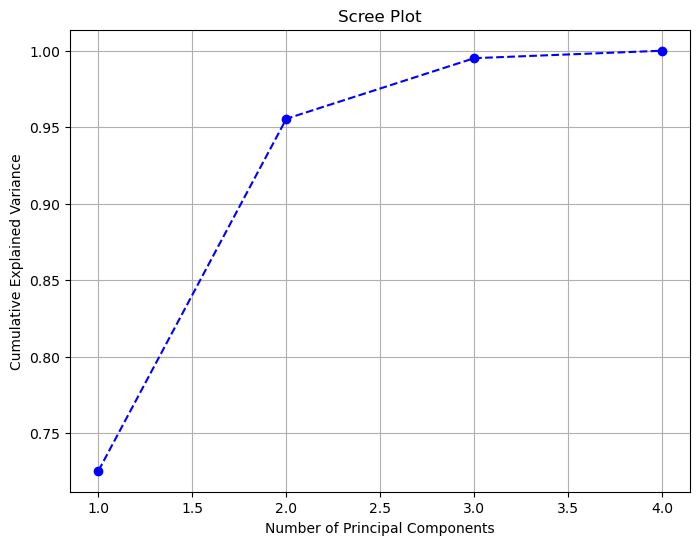

In [58]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Connect to MLFlow
mlflow.set_tracking_uri("https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow")
mlflow.set_experiment("VINUTHNA_PYTHON_ML_PROJECT_EXPERIMENT")

# Load dataset
X, y = load_iris(return_X_y=True)
feature_names = ["feature_1", "feature_2", "feature_3", "feature_4"]
X = pd.DataFrame(X, columns=feature_names)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Apply PCA for Dimensionality Reduction ----

# Standard Scaling for PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Explained Variance Ratio (Scree Plot)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Scree plot to visualize which components to select
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('scree_plot.png')

# Log the scree plot and PCA results
with mlflow.start_run(run_name="PCA for Dimensionality Reduction"):
    mlflow.log_param("n_components", X_train_pca.shape[1])
    mlflow.log_metric("total_explained_variance", cumulative_explained_variance[-1])
    mlflow.log_artifact('scree_plot.png')  # Log the saved scree plot image

# ---- Select Number of Components Based on Scree Plot ----
# Let's select components that explain at least 95% of the variance
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Number of components selected to explain {threshold * 100}% variance: {num_components}")

# Apply PCA again with selected components
pca = PCA(n_components=num_components)
X_train_pca_selected = pca.fit_transform(X_train_scaled)
X_test_pca_selected = pca.transform(X_test_scaled)

# ---- Model Training and Evaluation ----

# Define models
log_reg = LogisticRegression(max_iter=200, solver="lbfgs", multi_class="multinomial")
ridge = RidgeClassifier()
random_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Ridge Classifier": ridge,
    "Random Forest": random_forest,
    "XGBoost": xgb
}

# Function for training and evaluating models
def train_and_evaluate(model_name, model, X_train, y_train):
    # Create pipeline
    pipeline = Pipeline([
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_train_pred = pipeline.predict(X_train)

    # Evaluate the model
    f1_train = f1_score(y_train, y_train_pred, average="weighted")
    accuracy = accuracy_score(y_train, y_train_pred)

    # Compute confusion matrix for TP, TN, FP, FN
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    for i, class_name in enumerate(np.unique(y_train)):  # Class labels
        TP = conf_matrix[i, i]
        TN = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - TP)
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP

        mlflow.log_metric(f"TP_Class_{class_name}", TP)
        mlflow.log_metric(f"TN_Class_{class_name}", TN)
        mlflow.log_metric(f"FP_Class_{class_name}", FP)
        mlflow.log_metric(f"FN_Class_{class_name}", FN)

    print(f"{model_name} - Train F1 Score: {f1_train}")
    print(f"{model_name} - Accuracy: {accuracy}")

    return f1_train, accuracy, conf_matrix

# ---- Log the results in MLFlow ----

with mlflow.start_run(run_name="PCA with Feature Selection and Model Evaluation"):
    for model_name, model in models.items():
        # Log metrics for each model
        print(f"{model_name} Results:")
        f1, accuracy, conf_matrix = train_and_evaluate(model_name, model, X_train_pca_selected, y_train)

        # Log metrics
        mlflow.log_metric(f"{model_name}_train_f1", f1)
        mlflow.log_metric(f"{model_name}_train_accuracy", accuracy)

        # Log confusion matrix as an artifact
        mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, f"confusion_matrix_{model_name}.json")

        # Log model with input example
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{model_name}_pipeline",
            registered_model_name=f"{model_name}Pipeline",
            input_example=X_train_pca_selected[:1]  # Log input example to remove warnings
        )

print("PCA and Model Evaluation Completed.")


In [59]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Connect to MLFlow
mlflow.set_tracking_uri("https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow")
mlflow.set_experiment("VINUTHNA_PYTHON_ML_PROJECT_EXPERIMENT")

# Load dataset
X, y = load_iris(return_X_y=True)
feature_names = ["feature_1", "feature_2", "feature_3", "feature_4"]
X = pd.DataFrame(X, columns=feature_names)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection Using Mutual Information
def feature_selection_mutual_info(X_train, y_train, threshold=0.1):
    # Calculate mutual information between features and target
    mi = mutual_info_classif(X_train, y_train)
    
    # Select features with mutual information above the threshold
    selected_features = X_train.columns[mi > threshold]
    print(f"Selected features based on mutual information: {selected_features}")
    return X_train[selected_features]

# Apply feature selection
X_train_selected = feature_selection_mutual_info(X_train, y_train)

# ---- Model Training ----
log_reg = LogisticRegression(max_iter=200, solver="lbfgs", multi_class="multinomial")
random_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Random Forest": random_forest,
    "XGBoost": xgb
}

# Function for training and evaluating models
def train_and_evaluate(model_name, model, X_train, y_train):
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Apply scaling
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_train_pred = pipeline.predict(X_train)

    # Evaluate the model
    f1_train = f1_score(y_train, y_train_pred, average="weighted")
    accuracy = accuracy_score(y_train, y_train_pred)

    # Compute confusion matrix for TP, TN, FP, FN
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    for i, class_name in enumerate(np.unique(y_train)):  # Class labels
        TP = conf_matrix[i, i]
        TN = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - TP)
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP

        mlflow.log_metric(f"TP_Class_{class_name}", TP)
        mlflow.log_metric(f"TN_Class_{class_name}", TN)
        mlflow.log_metric(f"FP_Class_{class_name}", FP)
        mlflow.log_metric(f"FN_Class_{class_name}", FN)

    print(f"{model_name} - Train F1 Score: {f1_train}")
    print(f"{model_name} - Accuracy: {accuracy}")

    return f1_train, accuracy, conf_matrix

# Log the results in MLFlow
with mlflow.start_run(run_name="Custom Feature Selection Experiment"):
    for model_name, model in models.items():
        print(f"{model_name} Results:")
        f1, accuracy, conf_matrix = train_and_evaluate(model_name, model, X_train_selected, y_train)

        # Log metrics
        mlflow.log_metric(f"{model_name}_train_f1", f1)
        mlflow.log_metric(f"{model_name}_train_accuracy", accuracy)

        # Log confusion matrix as an artifact
        mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, f"confusion_matrix_{model_name}.json")

        # Log model with input example
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{model_name}_pipeline",
            registered_model_name=f"{model_name}Pipeline",
            input_example=X_train_selected[:1]  # Log input example to remove warnings
        )

print("Custom Feature Selection and Model Evaluation Completed.")


Selected features based on mutual information: Index(['feature_1', 'feature_2', 'feature_3', 'feature_4'], dtype='object')
Logistic Regression Results:
Logistic Regression - Train F1 Score: 0.9666666666666667
Logistic Regression - Accuracy: 0.9666666666666667


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
Registered model 'Logistic RegressionPipeline' already exists. Creating a new version of this model...
2024/12/19 20:35:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic RegressionPipeline, version 5
Created version '5' of model 'Logistic RegressionPipeline'.


Random Forest Results:
Random Forest - Train F1 Score: 1.0
Random Forest - Accuracy: 1.0


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
Registered model 'Random ForestPipeline' already exists. Creating a new version of this model...
2024/12/19 20:36:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random ForestPipeline, version 5
Created version '5' of model 'Random ForestPipeline'.
C:\Users\Vanu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:36:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
XGBoost - Train F1 Score: 1.0
XGBoost - Accuracy: 1.0


C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Registered model 'XGBoostPipeline' already exists. Creating a new version of this model...
2024/12/19 20:36:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoostPipeline, version 6
Created version '6' of model 'XGBoostPipeline'.


🏃 View run Custom Feature Selection Experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1/runs/8e2a4d6311db4502a4584732b644cb00
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1
Custom Feature Selection and Model Evaluation Completed.


In [60]:
# Experiment #7: Feature Engineering Experiment
import mlflow
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Connect to MLFlow
mlflow.set_tracking_uri("https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow")
mlflow.set_experiment("VINUTHNA_PYTHON_ML_PROJECT_EXPERIMENT")

# Load dataset
X, y = load_iris(return_X_y=True)
feature_names = ["feature_1", "feature_2", "feature_3", "feature_4"]
X = pd.DataFrame(X, columns=feature_names)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Feature Engineering ----
# 1. Log Transformation
log_transformer = FunctionTransformer(np.log1p, validate=True)
X_train_log = log_transformer.fit_transform(X_train)
X_test_log = log_transformer.transform(X_test)

# 2. Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 3. Feature Combination
X_train['feature_combination'] = X_train['feature_1'] * X_train['feature_2']
X_test['feature_combination'] = X_test['feature_1'] * X_test['feature_2']

# ---- Model Training ----
log_reg = LogisticRegression(max_iter=200, solver="lbfgs", multi_class="multinomial")
ridge = RidgeClassifier()
random_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

models = {
    "Logistic Regression": log_reg,
    "Ridge Classifier": ridge,
    "Random Forest": random_forest,
    "XGBoost": xgb
}

# Function for training and evaluating models
def train_and_evaluate(model_name, model, X_train, y_train):
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Apply scaling
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_train_pred = pipeline.predict(X_train)

    # Evaluate the model
    f1_train = f1_score(y_train, y_train_pred, average="weighted")
    accuracy = accuracy_score(y_train, y_train_pred)

    # Compute confusion matrix for TP, TN, FP, FN
    conf_matrix = confusion_matrix(y_train, y_train_pred)
    for i, class_name in enumerate(np.unique(y_train)):  # Class labels
        TP = conf_matrix[i, i]
        TN = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - TP)
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP

        mlflow.log_metric(f"TP_Class_{class_name}", TP)
        mlflow.log_metric(f"TN_Class_{class_name}", TN)
        mlflow.log_metric(f"FP_Class_{class_name}", FP)
        mlflow.log_metric(f"FN_Class_{class_name}", FN)

    print(f"{model_name} - Train F1 Score: {f1_train}")
    print(f"{model_name} - Accuracy: {accuracy}")

    return f1_train, accuracy, conf_matrix

# Log the results in MLFlow
with mlflow.start_run(run_name="Feature Engineering Experiment"):
    for model_name, model in models.items():
        print(f"{model_name} Results:")
        f1, accuracy, conf_matrix = train_and_evaluate(model_name, model, X_train, y_train)

        # Log metrics
        mlflow.log_metric(f"{model_name}_train_f1", f1)
        mlflow.log_metric(f"{model_name}_train_accuracy", accuracy)

        # Log confusion matrix as an artifact
        mlflow.log_dict({"confusion_matrix": conf_matrix.tolist()}, f"confusion_matrix_{model_name}.json")

        # Log model with input example
        mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path=f"{model_name}_pipeline",
            registered_model_name=f"{model_name}Pipeline",
            input_example=X_train[:1]  # Log input example to remove warnings
        )

print("Feature Engineering and Model Evaluation Completed.")


Logistic Regression Results:
Logistic Regression - Train F1 Score: 0.9666666666666667
Logistic Regression - Accuracy: 0.9666666666666667


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
Registered model 'Logistic RegressionPipeline' already exists. Creating a new version of this model...
2024/12/19 20:37:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic RegressionPipeline, version 6
Created version '6' of model 'Logistic RegressionPipeline'.


Ridge Classifier Results:
Ridge Classifier - Train F1 Score: 0.8491667354827546
Ridge Classifier - Accuracy: 0.85


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RidgeClassifier was fitted without feature names
  warnings.warn(
Registered model 'Ridge ClassifierPipeline' already exists. Creating a new version of this model...
2024/12/19 20:37:47 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Ridge ClassifierPipeline, version 5
Created version '5' of model 'Ridge ClassifierPipeline'.


Random Forest Results:
Random Forest - Train F1 Score: 1.0
Random Forest - Accuracy: 1.0


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


C:\Users\Vanu\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
Registered model 'Random ForestPipeline' already exists. Creating a new version of this model...
2024/12/19 20:38:13 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random ForestPipeline, version 6
Created version '6' of model 'Random ForestPipeline'.
C:\Users\Vanu\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:38:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
XGBoost - Train F1 Score: 1.0
XGBoost - Accuracy: 1.0


C:\Users\Vanu\anaconda3\Lib\site-packages\mlflow\types\utils.py:435: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Registered model 'XGBoostPipeline' already exists. Creating a new version of this model...
2024/12/19 20:38:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoostPipeline, version 7
Created version '7' of model 'XGBoostPipeline'.


🏃 View run Feature Engineering Experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1/runs/a67cdf7281c44c90a9b6f8f4974199b7
🧪 View experiment at: https://dagshub.com/ryallavinuthnareddy/VINUTHNA_PYTHON_ML_PROJECT.mlflow/#/experiments/1
Feature Engineering and Model Evaluation Completed.


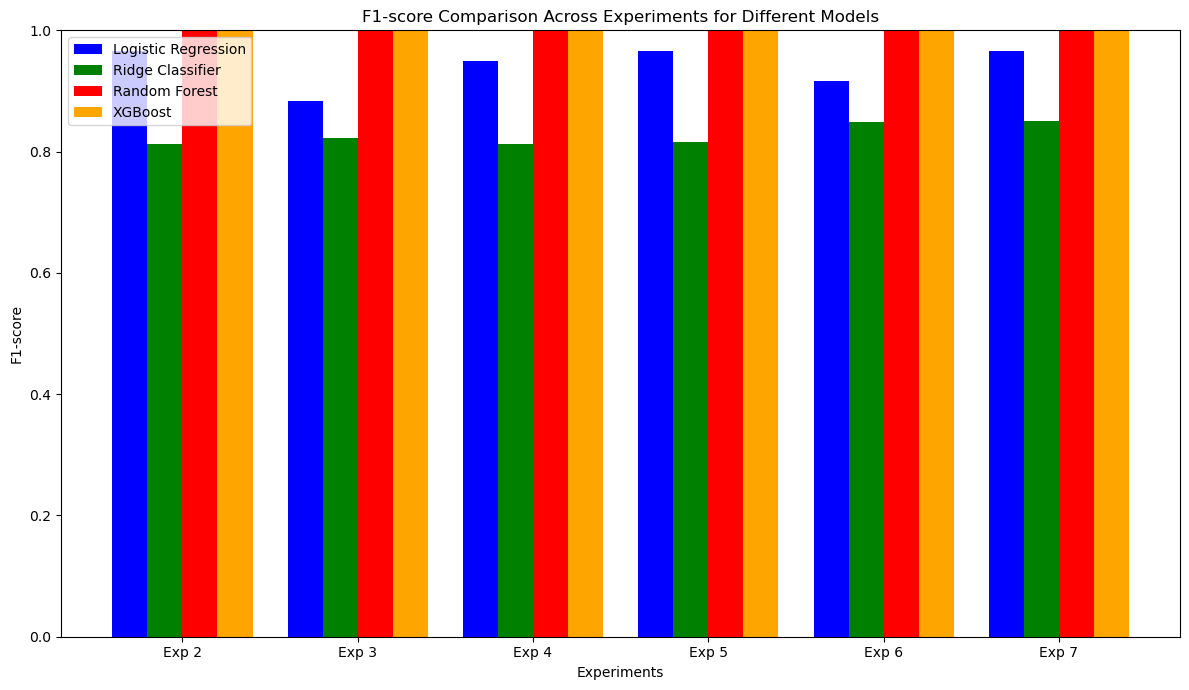

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# F1-scores from Experiment 2 to Experiment 7 for each model
# Example data for each model from Experiments 2 to 7
f1_scores = {
    "Logistic Regression": [0.9666666667, 0.8831874088, 0.95, 0.9666666667, 0.9166666667, 0.9666666667],
    "Ridge Classifier": [0.813174603, 0.8222582687, 0.8129123897, 0.8166666667, 0.8491667355, 0.85],
    "Random Forest": [1, 1, 1, 1, 1, 1],
    "XGBoost": [1, 1, 1, 1, 1, 1]
}

# Labels for experiments
experiments = ["Exp 2", "Exp 3", "Exp 4", "Exp 5", "Exp 6", "Exp 7"]

# Set the position for each bar group (model)
x = np.arange(len(experiments))  # X-axis labels for experiments
width = 0.2  # Bar width

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the bars for each model
rects1 = ax.bar(x - width*1.5, f1_scores["Logistic Regression"], width, label="Logistic Regression", color='blue')
rects2 = ax.bar(x - width/2, f1_scores["Ridge Classifier"], width, label="Ridge Classifier", color='green')
rects3 = ax.bar(x + width/2, f1_scores["Random Forest"], width, label="Random Forest", color='red')
rects4 = ax.bar(x + width*1.5, f1_scores["XGBoost"], width, label="XGBoost", color='orange')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Experiments')
ax.set_ylabel('F1-score')
ax.set_title('F1-score Comparison Across Experiments for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(experiments)
ax.legend()

# Show the plot
plt.ylim(0, 1)  # Set the Y-axis limit from 0 to 1 (for F1-score)
plt.tight_layout()
plt.show()


In [67]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(best_model, 'logistic_regression_model.joblib')


['logistic_regression_model.joblib']

In [69]:
!pip install fastapi uvicorn


  Obtaining dependency information for fastapi from https://files.pythonhosted.org/packages/52/b3/7e4df40e585df024fac2f80d1a2d579c854ac37109675db2b0cc22c0bb9e/fastapi-0.115.6-py3-none-any.whl.metadata
  Obtaining dependency information for uvicorn from https://files.pythonhosted.org/packages/61/14/33a3a1352cfa71812a3a21e8c9bfb83f60b0011f5e36f2b1399d51928209/uvicorn-0.34.0-py3-none-any.whl.metadata
  Obtaining dependency information for starlette<0.42.0,>=0.40.0 from https://files.pythonhosted.org/packages/96/00/2b325970b3060c7cecebab6d295afe763365822b1306a12eeab198f74323/starlette-0.41.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/94.8 kB ? eta -:--:--
   ----------------- ---------------------- 41.0/94.8 kB 991.0 kB/s eta 0:00:01
   ----------------- ---------------------- 41.0/94.8 kB 991.0 kB/s eta 0:00:01
   ----------------- ---------------------- 41.0/94.8 kB 991.0 kB/s eta 0:00:01
   ------------------------- -------------- 61.4/94.8 kB 297.7 kB/s e

In [71]:
!pip install --upgrade typing-extensions


In [4]:
import subprocess

# Run FastAPI server using subprocess (this will run it in the background)
subprocess.Popen(['uvicorn', 'app:app', '--reload', '--host', '0.0.0.0', '--port', '8000'])


<Popen: returncode: None args: ['uvicorn', 'app:app', '--reload', '--host', ...>